# intro

# prepare

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data

data is provided by https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases; updated everyday

In [152]:
df1 = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv&filename=time_series_2019-ncov-Confirmed.csv')

In [153]:
df1.shape

(487, 65)

In [154]:
df1.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455


# Analysis of the exponential trend

Researches show that epidemic growth profiles can range from sub-exponential to exponential growth dynamics (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5348083/)

N_cumulative = a exp(b N_outbreak_days)

where a and b are some constant 

apparently from above formula, if the growth dynamic is exponential, log(N_cumulative) and N_outbreak_days should have a linear relationship, with slope = b, and intercept = log(a)


Therefore in this notebook, we will simply examine the relationship by ploting log(N_cumulative) vs N_outbreak_days, and use the visualization to analyze the speed, peak and where the growth slows down.

## analysis of Hubei data

As we know, with no effective human intervene, the log(y) vs x will show a straight line, and its derivative therefore will be a constant.

The plot shows that the first a few days in Hubei, China, is even worse than that. In the first week of lockdown, the number of cases is increasing more rapidly than that - the derivative has a clear going-up trend.

However, since Jan 28, 2020, roughly 6 days after lock down, the derivative starts to drop, showing when the restriction atually started flatten the curve. 


In [155]:
df_hb = df1.loc[(df1['Country/Region']=='China')&(df1['Province/State']=='Hubei'),:]

In [156]:
df_hb

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
154,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67786,67790,67794,67798,67799,67800,67800,67800,67800,67800


It can be seen that the plot that the plot is shown as a curve, instead of a straight line, showing effect of human intervene biased the situation from how natural outbreak should look

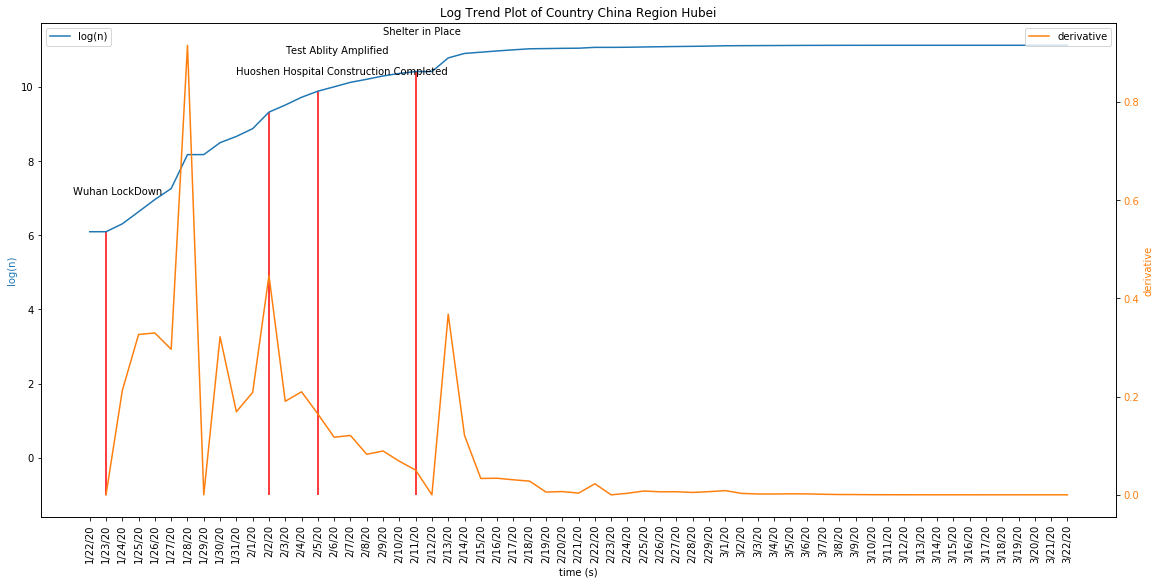

In [157]:
def log_trenplot(y, country=None, region=None, figsize = (16,8), special_event = {}):
    """
    This is a plot showing log(N_cumulative) vs N_outbreak_days (count from the day first case appear)
    with trend derivative and time point of special events
    
    
    
    """
    # obtain the data
    if y is None:
        y= df1.loc[(df1['Country/Region']==country)&(df1['Province/State']==region),:].iloc[0, 4:].copy(deep=True)
    x = pd.Series(df1.columns.tolist()[4:]).copy(deep=True)

    # obtain the log
    y1 =np.log(y[y>0].astype(float))
    x1 = range(len(y1))
    dy1 = y1.values[1:] - y1.values[:-1]
    xlabel = y[y > 0].index

    # starting plot
    # plot the logy vs x
    fig, ax1 = plt.subplots(constrained_layout=True, figsize=(16,8))
    color = 'tab:blue'

    ax1.plot(x1, y1, label='log(n)')
    
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('log(n)', color=color)
    ax1.set_title('Log Trend Plot of Country {} Region {}'.format(country, region))
    ax1.legend()
    
    plt.xticks(x1, xlabel, rotation=90)

    # plot the derivative
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:orange'
    ax2.set_ylabel('derivative', color=color)  # we already handled the x-label with ax1
    ax2.plot(x1[1:], dy1, label='derivative', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax2.legend()
     
    
    
    # plot special event
    if len(special_event)>0:
        s_x = list(special_event.keys())
        s_label = list(special_event.values())

        s_x1 = [y1.index.tolist().index(i) for i in s_x]
        s_y1 = y1.iloc[s_x1].values

        for i in range(len(s_x1)):
            ax1.vlines(s_x1[i], -1, s_y1[i], label=s_label[i], color='red')
            ax1.text(s_x1[i]-2, s_y1[i]+1, s=s_label[i])
    plt.show()
    
    return fig1, ax, y1


fig1, ax, y1=log_trenplot(None, 'China', 'Hubei', special_event = {'1/23/20': 'Wuhan LockDown',                 
             '2/2/20': 'Huoshen Hospital Construction Completed',
             '2/5/20': 'Test Ablity Amplified',
             '2/11/20': 'Shelter in Place'

            })



## Analysis of Italy data

it looks like the curve in Italy is slowly flatten down now, with b sligtly decreasing in the recent a few days

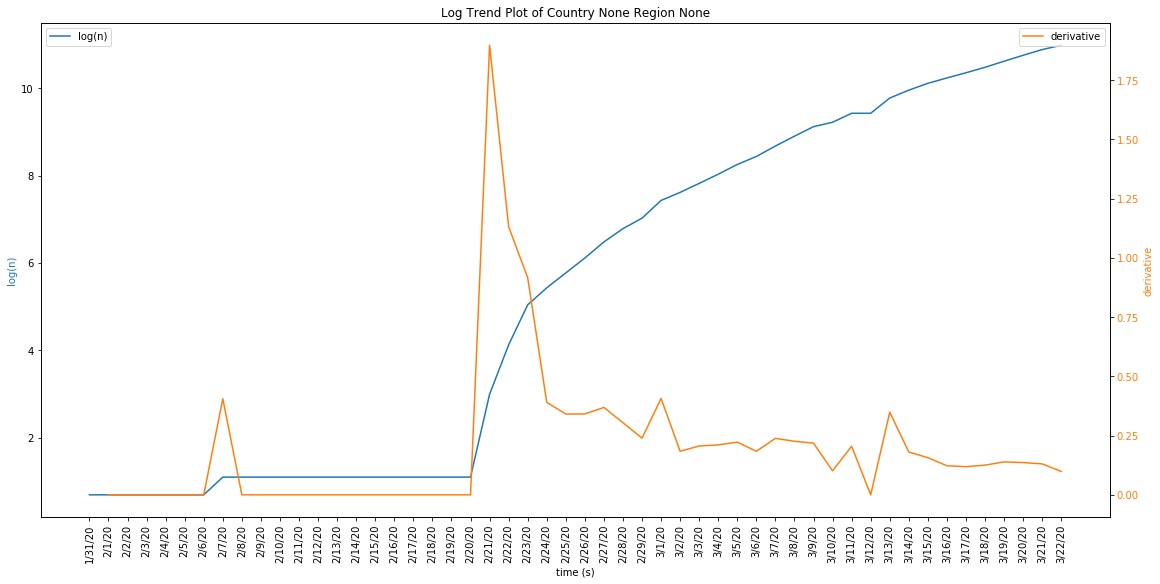

In [158]:

y = df1.loc[(df1['Country/Region']=='Italy'), :].iloc[0, 4:].copy(deep=True)
fig1, ax, y1=log_trenplot(y)

## analysis of US, Mass



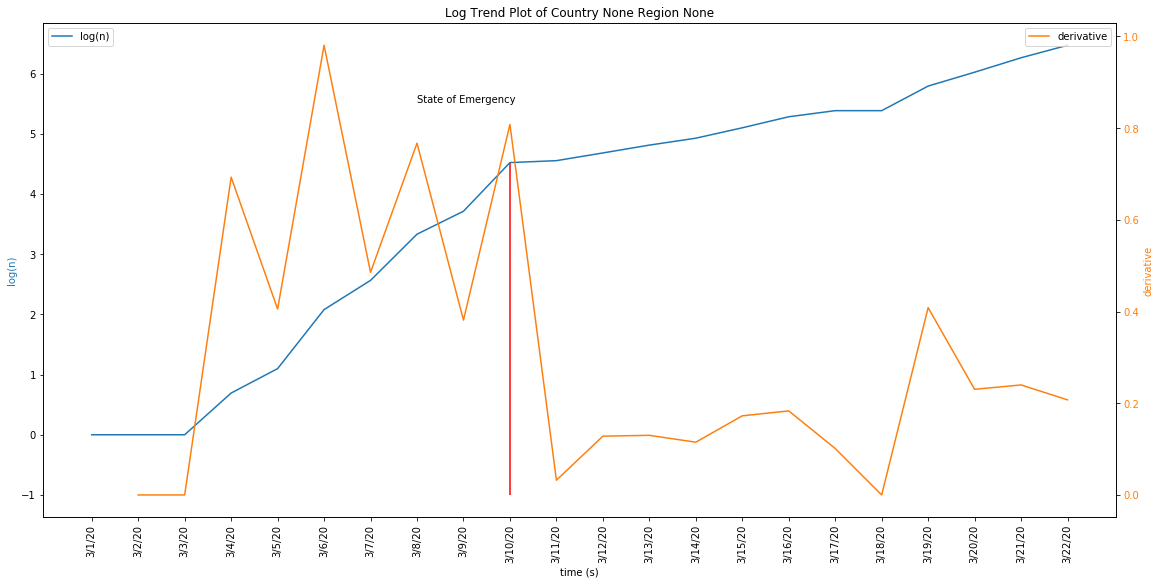

In [160]:
# update mass data
country = 'US'
region = 'Massachusetts'
y= df1.loc[(df1['Country/Region']==country)&(df1['Province/State']==region),:].iloc[0, 4:].copy(deep=True)
y[39:48] = [1, 1, 1, 2, 3, 8, 13, 28, 41]


fig1, ax, y1=log_trenplot(y, special_event = {'3/10/20': 'State of Emergency'})